In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data//diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


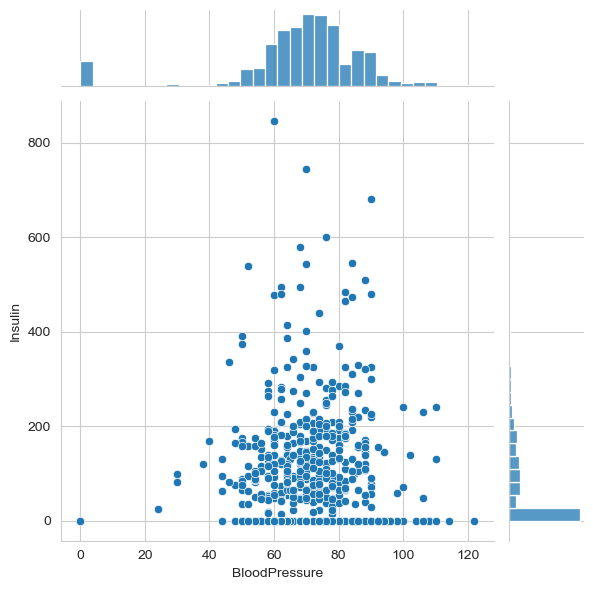

In [5]:
sns.set_style('whitegrid')
grid = sns.JointGrid(x="BloodPressure", y="Insulin", data =df );
grid.plot(sns.scatterplot, sns.histplot)

<Axes: xlabel='Glucose', ylabel='Count'>

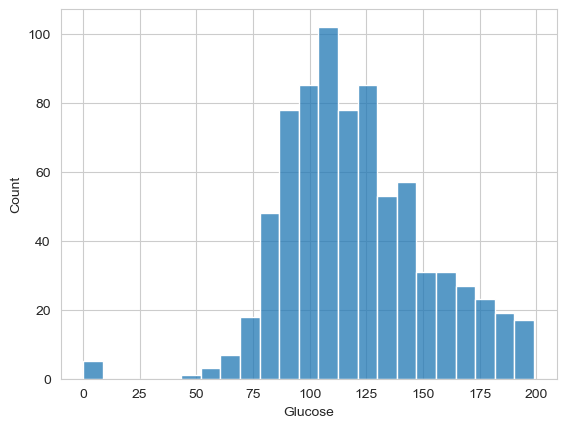

In [6]:
sns.histplot(x="Glucose", data=df)

<Axes: xlabel='Glucose', ylabel='Outcome'>

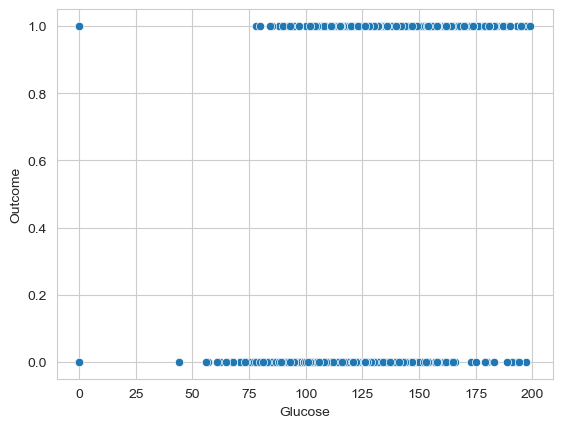

In [7]:
sns.scatterplot(x="Glucose", y="Outcome", data=df)

In [8]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=9)

In [11]:
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
log = LogisticRegression()
log.fit(scaled_X_train, y_train)

LogisticRegression()

In [14]:
log.coef_

array([[ 0.45177101,  1.20823549, -0.24409467, -0.03163059, -0.15453656,
         0.71792907,  0.41365104,  0.19034002]])

In [15]:
coef = pd.Series(index=X.columns, data=log.coef_[0])
coef.sort_values(inplace=True)

C:\Users\arif\AppData\Local\Temp\ipykernel_15564\3849059086.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef.index, y=coef.values, palette="bright")


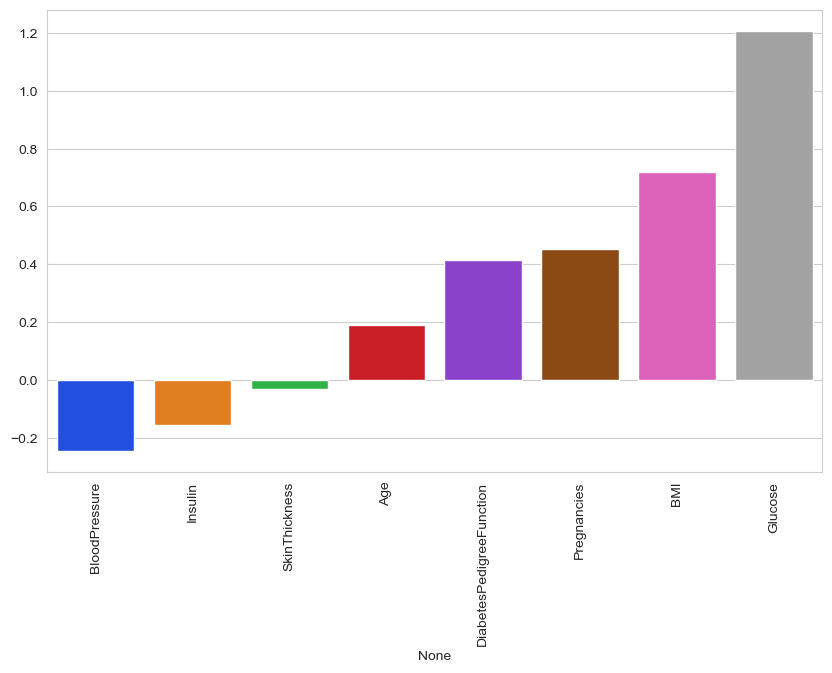

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(x=coef.index, y=coef.values, palette="bright")
plt.xticks(rotation=90);

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [18]:
hasta_pred = log.predict(scaled_X_test)

In [19]:
accuracy_score(y_test, hasta_pred)

0.7467532467532467

In [20]:
cm = confusion_matrix(y_test, hasta_pred)

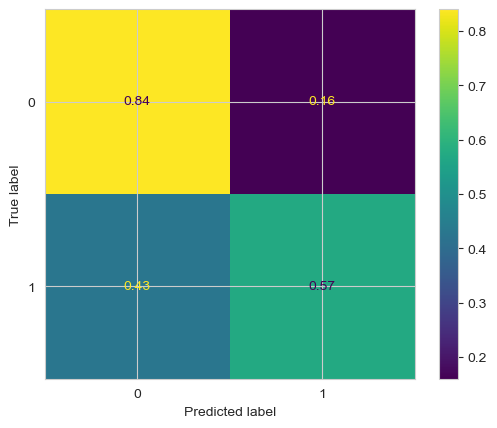

In [21]:
ConfusionMatrixDisplay.from_estimator(log, scaled_X_test, y_test, normalize="true")

In [22]:
print(classification_report(y_test, hasta_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



In [23]:
import joblib

In [24]:
filename = "log_model.sav"
joblib.dump(log, filename)

['log_model.sav']

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
model = joblib.load("log_model.sav")

In [27]:
hasta=[[4,20,70,20,32,32,2.1,25]]

In [28]:
model.predict(hasta)[0]

1

In [29]:
model.predict_proba(hasta)[0][1]

0.9999999999999665